# Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math,os
from numpy.random import choice
#import scikitplot as skplt
from time import time

In [47]:
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

In [187]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [188]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
	'''
	scikit(sklearn) does not have support for mean absolute percentage error MAPE.
	This is because the denominator can theoretically be 0 and so the value would be undefined.
	So this is our implementation
	'''
# 	y_true = check_array(y_true)
# 	y_pred = check_array(y_pred)

	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true,y_pred):
    return roundup(r2_score(y_true,y_pred))

def mse(y_true,y_pred):
    return roundup(mean_squared_error(y_true,y_pred))

def mae(y_true,y_pred):
    return roundup(mean_absolute_error(y_true,y_pred))

def mape(y_true, y_pred):
    return roundup(mean_absolute_percentage_error(y_true,y_pred))

def roundup(a, digits=4):
    n = 10**-digits
    return round(math.ceil(a / n) * n, digits)

def isEven(num):
    if num%2 ==0:
        return True
    return False

def modLog(num):
    try:
        return log(num)
    except:
        return 0

def loadNumpy(name,path='.'):
    if ".npy" in name:
        fullPath = path+'/'+name
    else:
        fullPath = path+'/'+name+'.npy'
    return np.load(fullPath, allow_pickle=True)

In [50]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Getting Data

In [51]:
!gdown --id 1x3gfhI0kX-tckRoQRENF_jTCFLgILCuM

Downloading...
From: https://drive.google.com/uc?id=1x3gfhI0kX-tckRoQRENF_jTCFLgILCuM
To: /content/archive.zip
100% 1.43M/1.43M [00:00<00:00, 22.3MB/s]


In [52]:
!gdown --id 1E4zwntZ9Jo1CnZnOmKEDo1gpFce6Ic-U

Downloading...
From: https://drive.google.com/uc?id=1E4zwntZ9Jo1CnZnOmKEDo1gpFce6Ic-U
To: /content/odi.csv
37.5MB [00:00, 175MB/s]


In [53]:
!gdown --id 1uw5ZG9a2iyOW9OeZNUkq2hOPfog4WHGU

Downloading...
From: https://drive.google.com/uc?id=1uw5ZG9a2iyOW9OeZNUkq2hOPfog4WHGU
To: /content/t20.csv
21.0MB [00:00, 50.8MB/s]


In [54]:
!unzip -n '/content/archive.zip' -d '/content/data'

Archive:  /content/archive.zip


In [55]:
df_balls = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
print(df_balls.shape)
#df_balls.head()


(193468, 18)


In [56]:
df_matches = pd.read_csv("/content/data/IPL Matches 2008-2020.csv")
print(df_matches.shape)
#df_matches.head()

(816, 17)


In [57]:
data = pd.merge(left=df_matches, right=df_balls, on='id', how='right')
print(data.shape)
data.head()

(193468, 34)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [58]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [59]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['over'] = data['over']+1
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [60]:
data.loc[(data['over'] == 20) & (data['ball'] == 6)]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
202,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,20,6,BB McCullum,Mohammad Hafeez,P Kumar,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
228,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,1,20,6,MEK Hussey,S Badrinath,JR Hopes,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab,2008
430,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2,20,6,IK Pathan,SM Katich,Joginder Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Kings XI Punjab,Chennai Super Kings,2008
552,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,1,20,6,D Salunkhe,SK Trivedi,GD McGrath,0,0,0,0,0,NaN,NaN,NaN,NaN,Rajasthan Royals,Delhi Daredevils,2008
772,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,1,20,6,SM Pollock,Harbhajan Singh,Z Khan,0,0,0,0,1,bowled,SM Pollock,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192521,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2,20,6,AR Patel,K Rabada,KA Pollard,0,0,0,0,1,caught,AR Patel,RD Chahar,NaN,Delhi Capitals,Mumbai Indians,2020
192891,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,1,20,6,Mohammed Siraj,NA Saini,T Natarajan,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad,2020
193139,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,1,20,6,SO Hetmyer,RR Pant,T Natarajan,0,1,1,0,0,NaN,NaN,NaN,byes,Delhi Capitals,Sunrisers Hyderabad,2020
193224,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2,20,6,Sandeep Sharma,S Nadeem,A Nortje,0,0,0,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Delhi Capitals,2020


In [61]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [62]:
list1 = data['inning'].unique()
(list1)

array(['335982Kolkata Knight Riders', '335982Royal Challengers Bangalore',
       '335983Kings XI Punjab', ..., '1237180Sunrisers Hyderabad',
       '1237181Delhi Capitals', '1237181Mumbai Indians'], dtype=object)

In [63]:
data.loc[(data['over'] == 20) & (data['ball'] == 6) & (data['inning'] == list1[0])]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
202,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,335982Kolkata Knight Riders,20,6,BB McCullum,Mohammad Hafeez,P Kumar,6,0,6,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [64]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
data2.head()

,inning,total_runs
0,1082591Royal Challengers Bangalore,172
1,1082591Sunrisers Hyderabad,207
2,1082592Mumbai Indians,184
3,1082592Rising Pune Supergiant,187
4,1082593Gujarat Lions,183


In [65]:
data3 = pd.merge(left=data2, right=data, on='inning', how='right')
print(data3.shape)
data3.head()

(193468, 36)


,inning,total_runs_x,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [66]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['inning']==list1[i]]
    # ten_over = one_inning.loc[one_inning['over']<=10]
    # ten_over.shape
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','total_runs_x']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
#print(one_inning.shape)
print(data3.shape)
print(container.shape)

(193468, 36)
(193468, 10)


In [67]:
data3 = container.copy()
container.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,total_runs_x,CUMSUM_runs,CUMSUM_wickets
0,1,1,0,1,1,0,0,222,1,0
1,1,2,0,0,0,0,0,222,1,0
2,1,3,0,1,1,0,0,222,2,0
3,1,4,0,0,0,0,0,222,2,0
4,1,5,0,0,0,0,0,222,2,0


In [68]:
# featureColumns = ['venue','team1','team2','toss_decision','over','ball','batsman','non_striker','bowler',
#         'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','year']
featureColumns = ['over','ball',
         'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','CUMSUM_runs','CUMSUM_wickets']
print(len(featureColumns))

9


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [70]:
data3.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,total_runs_x,CUMSUM_runs,CUMSUM_wickets
0,1,1,0,1,1,0,0,222,1,0
1,1,2,0,0,0,0,0,222,1,0
2,1,3,0,1,1,0,0,222,2,0
3,1,4,0,0,0,0,0,222,2,0
4,1,5,0,0,0,0,0,222,2,0


In [71]:
data3['over_cur'] = data3['over'] + data3['ball']/10
data3 = data3[['over_cur',
         'batsman_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','total_runs_x']]
data3.astype(float)
data3 = data3.fillna(-99.00)
data3.isnull().values.any()
import pandas as pd
from sklearn import preprocessing
data3.head()

,over_cur,batsman_runs,total_runs_y,CUMSUM_runs,CUMSUM_wickets,total_runs_x
0,1.1,0,1,1,0,222
1,1.2,0,0,1,0,222
2,1.3,0,1,2,0,222
3,1.4,0,0,2,0,222
4,1.5,0,0,2,0,222


In [72]:
df_train = data3.loc[data3['over_cur']<=19.3]
df_test = data3.loc[data3['over_cur']>19.3]

x = df_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_fit = min_max_scaler.fit(x)
print(min_max_scaler.data_max_)
x_scaled = min_max_scaler.fit_transform(x)
df_train = pd.DataFrame(x_scaled)
display(df_train.head())

x = df_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test = pd.DataFrame(x_scaled)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

[ 19.3   6.    7.  245.   10.  263. ]


,0,1,2,3,4,5
0,0.000000,0.0,0.142857,0.004082,0.0,0.842912
1,0.005495,0.0,0.000000,0.004082,0.0,0.842912
2,0.010989,0.0,0.142857,0.008163,0.0,0.842912
3,0.016484,0.0,0.000000,0.008163,0.0,0.842912
4,0.021978,0.0,0.000000,0.008163,0.0,0.842912


,0,1,2,3,4,5
0,0.000000,0.666667,0.571429,0.643979,0.222222,0.775956
1,0.066667,0.166667,0.142857,0.649215,0.222222,0.775956
2,0.133333,0.666667,0.571429,0.670157,0.222222,0.775956
3,0.466667,1.000000,0.857143,0.701571,0.222222,0.775956
4,0.533333,1.000000,0.857143,0.732984,0.222222,0.775956


Size of training data : 181762
Size of test data : 11706


# New data

In [73]:
!gdown --id  1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT

Downloading...
From: https://drive.google.com/uc?id=1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT
To: /content/ipl.csv
9.48MB [00:00, 81.1MB/s]


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/ipl.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train.reshape(-1, 1))
y_test = sc.transform(y_test.reshape(-1, 1))
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R-squared value: 0.6736032641432417
Custom accuracy: 19004


In [ ]:
X_train

array([[-1.12133174, -1.19657106, -1.08560674, -0.74284457, -0.08041679],
       [-0.32223605,  0.79126343,  0.127637  , -0.69319125, -0.54439427],
       [ 2.15700955, -0.69961244,  1.6528577 ,  4.12318127,  5.20892644],
       ...,
       [-1.32622807, -0.69961244, -1.44957986, -1.14007117, -0.63718977],
       [ 0.80469377,  0.29430481,  0.97690762,  0.34952858,  0.19796969],
       [-0.69104944, -0.69961244, -0.89495415,  0.10126195,  0.19796969]])

# nn

In [92]:
dataset1 = pd.read_csv("/content/odi.csv")
dataset2 = pd.read_csv("/content/t20.csv")
dataset3 = pd.read_csv("/content/ipl.csv")
# dataset = pd.concat([dataset1,dataset2,dataset3])
dataset = dataset3.copy()
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset1.shape, dataset2.shape, dataset3.shape, dataset.shape)
#print(dataset.isna().sum())
dataset = dataset.iloc[:,[7,8,9,12,13,14]]
# df_train = dataset.iloc[:,[7,8,9,12,13,14]].values #Input features
# df_test = dataset.iloc[:, 14].values #Label
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))
# np.random.seed(random_seed)
# np.random.shuffle(indices)
df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

# print(df_train.describe())
# print(df_test.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()
#X_test = sc.transform(X_test)
# x = df_train.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_fit = min_max_scaler.fit(x)
# print(min_max_scaler.data_max_)
# x_scaled = min_max_scaler.fit_transform(x)
# df_train = pd.DataFrame(x_scaled)
df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()
# x = df_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_test = pd.DataFrame(x_scaled)
df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

(350899, 15) (180777, 15) (76014, 15) (76014, 15)


,0,1,2,3,4,label
0,0.473395,0.289480,0.609111,1.097382,0.012159,0.506667
1,0.801138,-0.702549,0.314621,1.445948,3.074270,0.783333
2,-1.288223,-1.198563,-1.417674,-0.745042,-0.730170,0.543333
3,-0.899029,-1.198563,-1.088538,-0.197294,-0.173423,0.603333
4,-1.431611,-0.702549,-1.608226,-1.242994,-0.822962,0.533333


,0,1,2,3,4,label
0,0.063642,-0.703317,-0.271986,0.451055,1.177429,0.543333
1,0.104539,0.297471,0.282622,0.251351,-0.437395,0.486667
2,-0.652044,-0.703317,-0.462633,-0.247909,0.998004,0.466667
3,-0.488459,0.297471,-0.410638,0.051647,-0.257970,0.540000
4,-1.122353,-1.203711,-1.433197,-0.697243,-0.616820,0.473333


Size of training data : 72214
Size of test data : 3800


In [181]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms = transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)


dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [149]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        # self.input_linear = torch.nn.Linear(D_in, H)
        # self.output_linear = torch.nn.Linear(H, D_out)
        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, H6)
        self.linear7 = nn.Linear(H6, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = F.leaky_relu(self.linear6(x))
        x = self.linear7(x)
        #print(x.shape[0])
        return x.view(batch_size)
        # x = x.view(x.shape[0])
        # return x            

In [150]:
D_in, H1, H2, H3, H4, H5, H6, D_out = 5, 64, 128, 256, 128, 128, 64, 1

In [151]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

521
42
3800


In [152]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return (right)

In [154]:
model = mymodel(D_in, H1, H2, H3, H4, H5, H6, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=5, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=1, bias=True)
)


In [155]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 100,609 trainable parameters


In [156]:
%%time
step = 0
epochs = 200
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in train_loader:

        # Clear the gradients of all optimized tensors
        #print(inputs)
        #print(inputs,labels)
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels = input, labels        
        # Forward pass
        model.train()
        #print(type(inputs))
        outputs = model.forward(inputs)
        predicted = outputs.data
        #print(predicted,labels)
        #print(labels,predicted)
        #print(predicted,labels)
    
        #print(predicted,labels)

        #training_total += labels.size(0)
                
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())
        #training_correct += r2_loss
        
        #train_acc = training_correct
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            #count=0         
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                #count+=1
                #print(count)
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                #print(predicted2,labels2)
                valid_r2_ =  r2(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                #val_acc = custom_accuracy(labels2,predicted2)
                valid_loss = criterion(outputs2, labels2)
                # val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/200...  | Train Loss: 0.0067 | Val Loss: 0.0046 | Train R2: -0.1132 | Val R2: 0.0403 | Val Acc: 45.9449 %
Epoch: 2/200...  | Train Loss: 0.0049 | Val Loss: 0.0045 | Train R2: 0.0655 | Val R2: 0.3048 | Val Acc: 45.2753 %
Epoch: 3/200...  | Train Loss: 0.0047 | Val Loss: 0.0047 | Train R2: 0.0902 | Val R2: 0.1764 | Val Acc: 46.4658 %
Epoch: 4/200...  | Train Loss: 0.0046 | Val Loss: 0.0043 | Train R2: 0.1055 | Val R2: 0.2845 | Val Acc: 43.9174 %
Epoch: 5/200...  | Train Loss: 0.0046 | Val Loss: 0.0042 | Train R2: 0.1154 | Val R2: 0.1349 | Val Acc: 47.6376 %
Epoch: 6/200...  | Train Loss: 0.0045 | Val Loss: 0.0047 | Train R2: 0.1282 | Val R2: 0.1595 | Val Acc: 42.5409 %
Epoch: 7/200...  | Train Loss: 0.0044 | Val Loss: 0.0042 | Train R2: 0.1439 | Val R2: 0.3282 | Val Acc: 46.7820 %
Epoch: 8/200...  | Train Loss: 0.0044 | Val Loss: 0.0042 | Train R2: 0.1528 | Val R2: 0.2859 | Val Acc: 47.9725 %
Epoch: 9/200...  | Train Loss: 0.0044 | Val Loss: 0.0041 | Train R2: 0.1518 | Val R2: 0

In [200]:
with torch.no_grad(): 
      model.eval()  
      test_total=0 
      test_correct=0
      for input_images3, labels3 in test_loader:

          if torch.cuda.is_available():
              input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
          
          outputs3= model.forward(input_images3)
          predicted3 = outputs3.data
          #print(predicted3, labels3)
          test_r2_ =  r2(outputs3.detach().cpu().numpy(), labels3.detach().cpu().numpy())
          test_total += labels3.size(0)
          test_correct += custom_accuracy(labels3,predicted2,40/300) 
          #print(test_correct)
          test_r2_ +=  test_r2_

In [201]:
test_acc = test_correct/test_total*100
test_r2 = test_r2_/test_total
print(test_acc,test_r2)

74.86530172413794 0.0003275862068965517


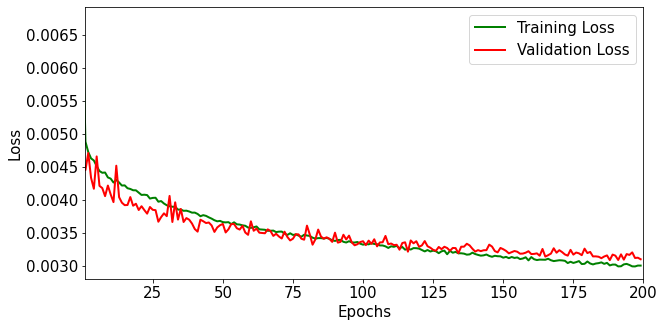

In [169]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.legend()
plt.show()

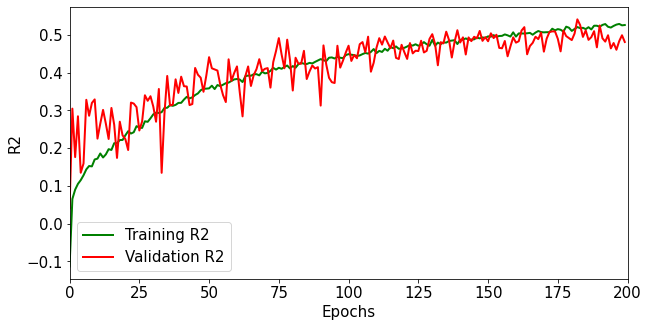

In [165]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.legend()
plt.show()

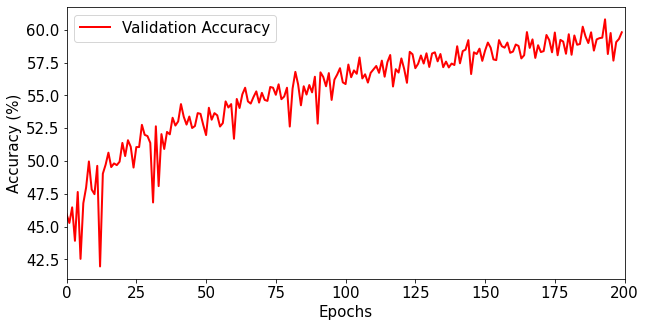

In [168]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
#plt.plot(val_acc_l[5:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.legend()
plt.show()